In [27]:
import os 
import cv2  
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
 
import tensorflow as tf 
from tensorflow.keras import layers,models,optimizers 
from tensorflow import keras 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout 

from sklearn.utils import shuffle  
import random  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import load_model 
import imgaug.augmenters as iaa


In [28]:
dataset_path="D:\ML\Image Classification\Training"
img_size=250 
 
train_data=[] 
train_labels=[]  
train_paths=[]

##Iterate through the dataset 
for img_name in os.listdir(dataset_path): 

    if(img_name[ :3]=='not'): 
        img_class='notsmoking' 
    else:
        img_class='smoking' 
    train_labels.append(img_class) 
    img_path=os.path.join(dataset_path,img_name) 
    train_paths.append(img_path) 
    img = cv2.imread(img_path)  
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue  # skip this iteration if image not loaded
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    train_data.append([img,img_class])


   


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_16936\2046990827.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset_path="D:\ML\Image Classification\Training"


In [29]:
dataset_path="D:\ML\Image Classification\Testing"
img_size=250 
 
test_data=[] 
test_labels=[]  
test_paths=[]

##Iterate through the dataset 
for img_name in os.listdir(dataset_path): 

    if(img_name[ :3]=='not'): 
        img_class='notsmoking' 
    else:
        img_class='smoking' 
    test_labels.append(img_class) 
    img_path=os.path.join(dataset_path,img_name) 
    test_paths.append(img_path) 
    img=cv2.imread(img_path) 
    if img is None: 
        print(f"Failed to load image: {img_path}") 
        continue
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    test_data.append([img,img_class])


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_16936\688692814.py:1: SyntaxWarning: invalid escape sequence '\M'
  dataset_path="D:\ML\Image Classification\Testing"


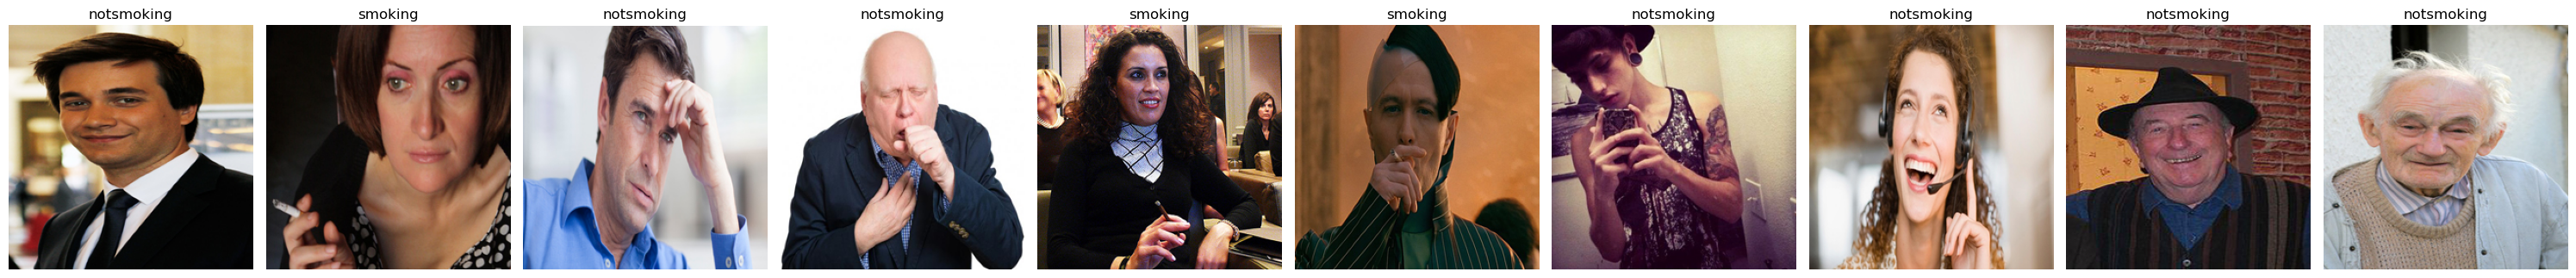

In [30]:
def display_random_images(images,labels,num_images=10): 
    num_total_images=len(images) 
    if num_total_images == 0:
        print("No images to display.")
        return 
    random_indices=np.random.choice(num_total_images,size=num_images,replace=False) 

    fig,axes=plt.subplots(1,num_images,figsize=(30,5))
    for i,idx in enumerate(random_indices): 
        axes[i].imshow(images[idx][0]) 
        axes[i].set_title(labels[idx]) 
        axes[i].axis('off') 
    plt.tight_layout() 
    plt.show() 
     
display_random_images(train_data,train_labels)


In [31]:
random.shuffle(train_data) 
random.shuffle(test_data) 


In [32]:
X_train, X_test, y_train, y_test = [], [], [], []

def extract_splits(data, target='train'):
    for features, label in data:
        if target == 'train':
            X_train.append(features)
            y_train.append(label)
        else:
            X_test.append(features)
            y_test.append(label)



In [33]:
extract_splits(train_data, target='train') 
extract_splits(test_data, target='test')

In [34]:
X_train=np.array(X_train)  
X_test=np.array(X_test)
 
y_train=np.array(y_train) 
y_test=np.array(y_test)

In [35]:
print("X_train shape",X_train.shape)  
print("X_test shape",X_test.shape)  

print("y_train shape",y_train.shape)  
print("y_test shape",y_test.shape) 


X_train shape (716, 250, 250, 3)
X_test shape (224, 250, 250, 3)
y_train shape (716,)
y_test shape (224,)


In [36]:
label_encoder=LabelEncoder() 
y_train_encoded=label_encoder.fit_transform(y_train) 
y_test_encoded=label_encoder.fit_transform(y_test) 

In [37]:
y_train_encoded

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [38]:
def display_seq_images(images,labels,num_images=5): 
    num_total_images=len(images) 
    fig,axes=plt.subplots(1,num_images,figsize=(30,5))
    for i,idx in enumerate(range(num_images)): 
      axes[i].imshow(images[idx],aspect='auto') 
      axes[i].set_title(labels[idx]) 
      axes[i].axis('off') 
    plt.tight_layout() 
    plt.show()

In [39]:
def augment_images(images,labels,num_augmentations=4): 
    augmented_images=[] 
    augmented_labels=[] 
     
    seq=iaa.Sequential([
        iaa.Fliplr(1.0),                        ##Horizontal flip with 100% probability 
        iaa.Multiply((1.5,2.5),per_channel=0.5)])    ##Adjust Saturation 
    
    ##Apply augmentation to each image  
    for original_image,label in zip(images,labels): 
        augmented_images.append(original_image) 
        augmented_labels.append(label) 

        augmented_images.extend(seq(images=[original_image]*(num_augmentations))) 
        augmented_labels.extend([label]*(num_augmentations)) 
    return np.array(augmented_images),np.array(augmented_labels) 

num_augmentations=4 
 
augmented_images,augmented_labels=augment_images(X_train,y_train_encoded,num_augmentations)

In [40]:
preprocess_input=keras.applications.resnet50.preprocess_input 


In [41]:
img_shape=augmented_images[0].shape
base_model=keras.applications.ResNet50( 
    input_shape=img_shape, 
    include_top=False, 
    weights="imagenet",
)
base_model.trainable=False 
base_model.summary()
  

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 250, 250,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 256, 256,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 125, 125,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 125, 125,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 125, 125,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 127, 127,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 63, 63,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 63, 63,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 63, 63,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 63, 63,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 63, 63,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 63, 63,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 63, 63,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 63, 63,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 63, 63,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 63, 63,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 63, 63,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [42]:
##Build model on top of the pre trained base 
model=models.Sequential([  
    base_model, 
    layers.GlobalAveragePooling2D(), 
    layers.Dropout(0.5), 
    layers.Dense(512,activation = 'relu'), 
    layers.Dropout(0.5), 
    layers.Dense(2,activation='softmax')
])

In [43]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
history=model.fit(augmented_images,augmented_labels,epochs=10,batch_size=64,validation_data=(X_test,y_test_encoded))

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 276s 5s/step - accuracy: 0.6331 - loss: 1.6359 - val_accuracy: 0.8795 - val_loss: 0.3820
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 340s 6s/step - accuracy: 0.7784 - loss: 0.4663 - val_accuracy: 0.8348 - val_loss: 0.3704
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 300s 5s/step - accuracy: 0.8113 - loss: 0.4177 - val_accuracy: 0.8884 - val_loss: 0.3040
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 289s 5s/step - accuracy: 0.8456 - loss: 0.3592 - val_accuracy: 0.8884 - val_loss: 0.3086
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 293s 5s/step - accuracy: 0.8408 - loss: 0.3596 - val_accuracy: 0.8929 - val_loss: 0.2576
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 241s 4s/step - accuracy: 0.8581 - loss: 0.3232 - val_accuracy: 0.8884 - val_loss: 0.2580
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.8774 - loss: 0.2808 - val_accuracy: 0.9018 - val_loss: 0.2712
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.8893 - loss: 0.2731 - val_accuracy: 0.8884 - v

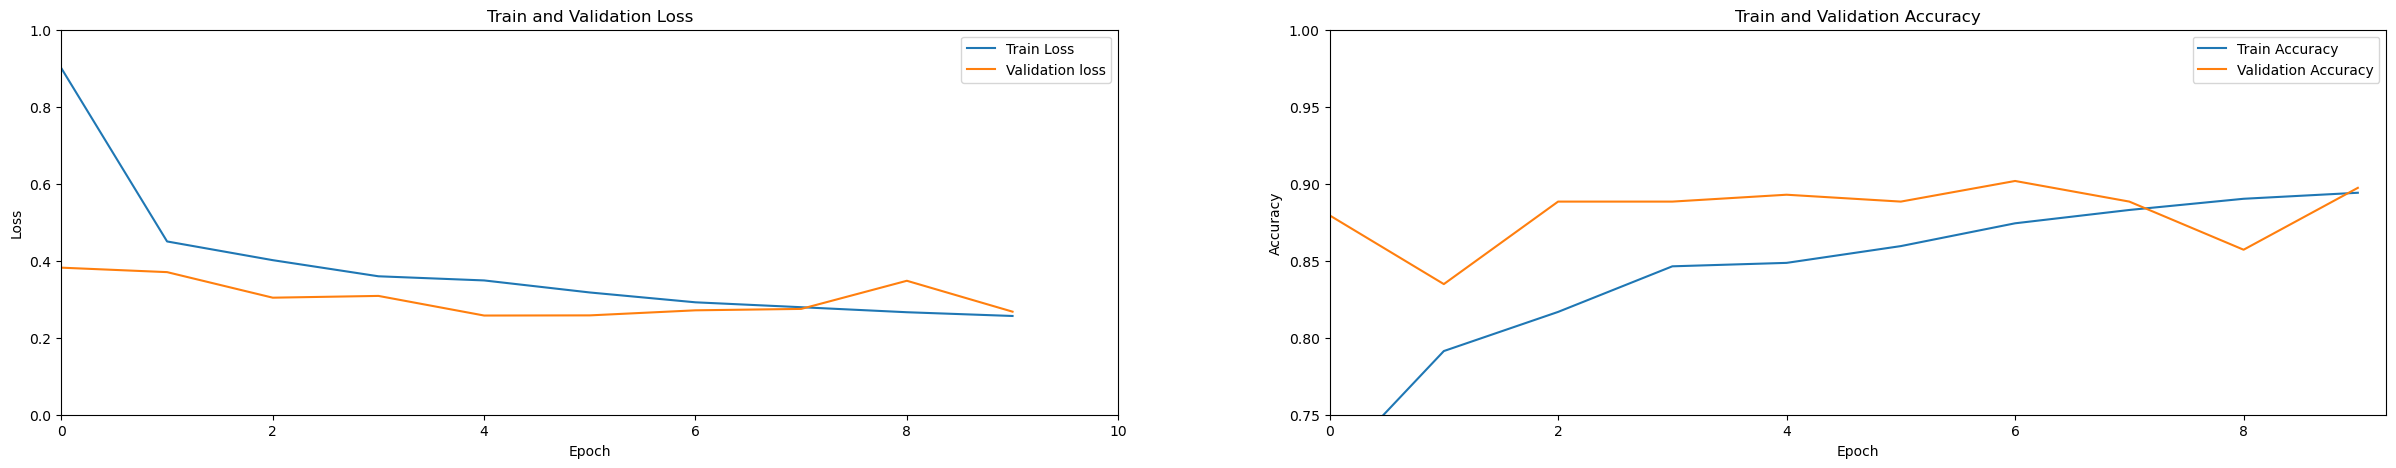

In [46]:
plt.figure(figsize=(30,5)) 
plt.subplot(1,2,1) 
plt.title("Train and Validation Loss") 
plt.xlabel("Epoch") 
plt.ylabel("Loss") 
plt.plot(history.history['loss'],label="Train Loss") 
plt.plot(history.history['val_loss'],label="Validation loss")
plt.xlim(0,10) 
plt.ylim(0.0,1.0)  
plt.legend() 



plt.subplot(1,2,2) 
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch") 
plt.ylabel("Accuracy") 
plt.plot(history.history['accuracy'],label="Train Accuracy") 
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")  
plt.xlim(0,9.25) 
plt.ylim(0.75,1.0) 
plt.legend() 
plt.show()



In [47]:
result=model.evaluate(X_test,y_test_encoded) 
 
print("Accuracy Score",result[1]*100) 


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9060 - loss: 0.2661
Accuracy Score 89.73214030265808


In [48]:
##Prediction  

y_pred=np.argmax(model.predict(X_test),axis=1) 
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [49]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,roc_auc_score,classification_report 
 
print("Accuracy Score : {:.2f}%".format(accuracy_score(y_test_encoded,y_pred)*100))  
print("Precision Score : {:.2f}%".format(precision_score(y_test_encoded,y_pred)*100))  
print("Recall Score : {:.2f}%".format(recall_score(y_test_encoded,y_pred)*100))  
print("F1 Score : {:.2f}%".format(f1_score(y_test_encoded,y_pred)*100))  
print("AUC Score : {:.2f}%".format(roc_auc_score(y_test_encoded,y_pred)*100)) 


Accuracy Score : 89.73%
Precision Score : 87.39%
Recall Score : 92.86%
F1 Score : 90.04%
AUC Score : 89.73%


In [50]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       112
           1       0.87      0.93      0.90       112

    accuracy                           0.90       224
   macro avg       0.90      0.90      0.90       224
weighted avg       0.90      0.90      0.90       224



In [51]:
from sklearn.metrics import ConfusionMatrixDisplay  

cm=confusion_matrix(y_test_encoded,y_pred) 
cm

array([[ 97,  15],
       [  8, 104]], dtype=int64)

<Axes: >

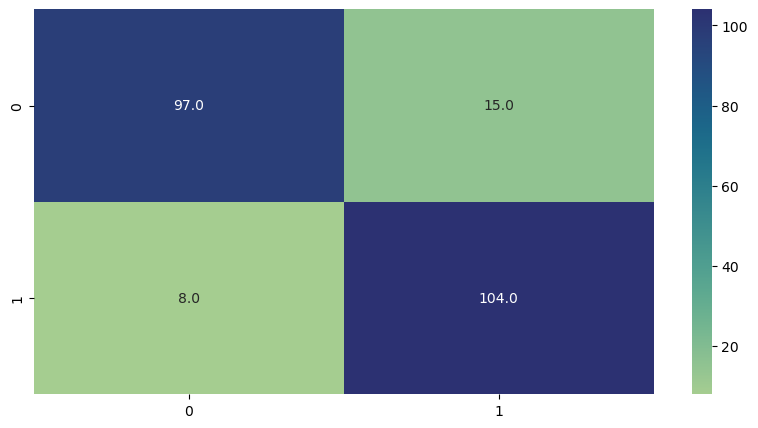

In [52]:
import seaborn as sns 
plt.figure(figsize=(10,5)) 
 
sns.heatmap(cm,annot=True,fmt=".1f",cmap="crest")